# **Matplotlib**

In [1]:
import matplotlib.pyplot as plt

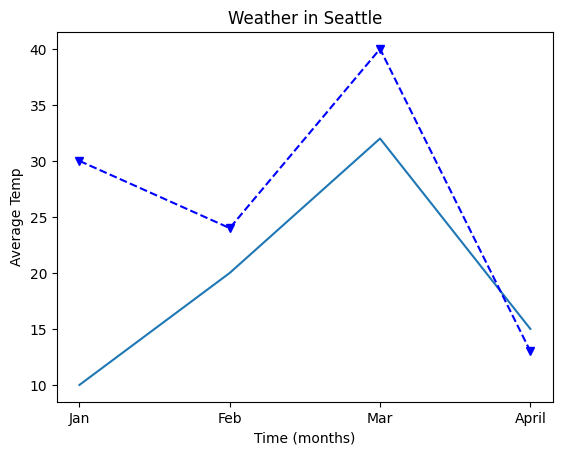

In [2]:
# figure object is a container that holds everything in the page
# axis is the part of the page that holds the data. Its a canvas where we will draw everything

fig, ax = plt.subplots()

ax.plot(['Jan', 'Feb', 'Mar', "April"], [10, 20, 32, 15])

# We can add another plot
# ax.plot(['Jan', "Feb", "Mar", "April"], [30, 24, 40, 13])

# We can also add marker for better visualization
# ax.plot(['Jan', "Feb", "Mar", "April"], [30, 24, 40, 13], marker="o")

# We can also change the line style for better visualization
# ax.plot(['Jan', "Feb", "Mar", "April"], [30, 24, 40, 13], marker="v", linestyle="--")

# We can also change the color
ax.plot(['Jan', "Feb", "Mar", "April"], [30, 24, 40, 13], marker="v", linestyle="--", color='b')

# Change x-axis, y-axis label, and the title
ax.set_xlabel("Time (months)")
ax.set_ylabel("Average Temp")
ax.set_title("Weather in Seattle")

plt.show()


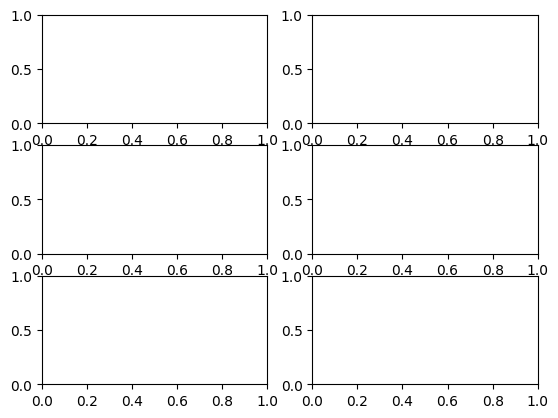

In [ ]:
# Create a plot with 3 rows 2 columns
# Now axis is an array with 3 row, 2 column
# sharey tell all the sub-plots to use the same range for y-axis

fig, ax = plt.subplots(3, 2, sharey=True)

# ax[0, 0].plot(plot_setting)

# If it has one row or one column then we can use 1D array like indexing
# fig, ax = plt.subplots(2, 1)
# ax[0].plot(plot_setting)



plt.show()

**Working with time-series data**


1.   Parse the column that has date
2.   Make it index using pandas set_index



In [ ]:
import pandas as pd

# read csv and set the date column as index and parse date data

file = pd.read_csv("file_path.csv", index_col="date", parse_dates=['date'])

# Plot visualize agher niyome

**Plotting time-series with different variable**

In [ ]:
# It might not show the desired output if we print two plot in same axes

# Using twin axes
fig, ax = plt.subplots()
ax.plot(["date index"], ["Date data"])

# Two axes share same x-axis but not y-axis
ax2 = ax.twinx()

# Coloring the ticks
# change the color of tick params in y_axis
ax.tick_params('y', colors="blue")

**Annotating time-series data**

In [ ]:
# First parameter is the text that we want in the plot
# xy parameter referse to where the logic of this annotation is
# xytext is where we want to put the text
# arrowprops parameter is adding a arrow pointing to xy data

ax2.annotate(">1 degree",
             xy=(pd.Timestamp('2015-10-06'), 1),
             xytext=(pd.Timestamp('2008-10-06'), -0.2),
             arrowprops={"arrowstyle": '->', "color": 'gray'})

# **Quantitive Comparisons**

**Bar Charts**

<ipython-input-9-382a6b8060bb>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation=90)


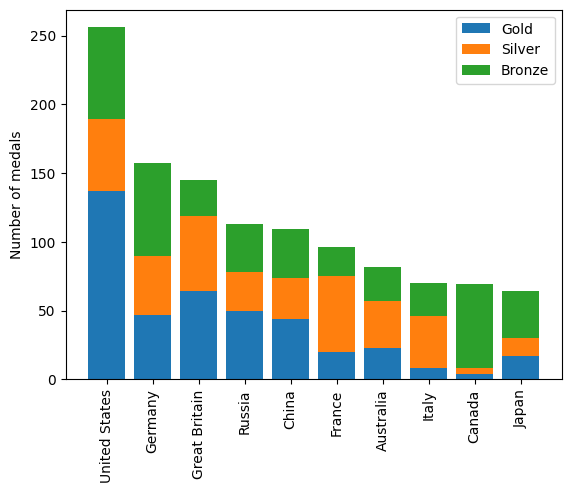

In [ ]:
import pandas as pd
medals = pd.read_csv("medals_by_country_2016.csv", index_col=0)
fig, ax = plt.subplots()

ax.bar(medals.index, medals['Gold'], label="Gold")

# Adding other medal (ex: Silver, Bronze) on the top of each other
ax.bar(medals.index, medals["Silver"], bottom=medals['Gold'], label="Silver")
ax.bar(medals.index, medals["Bronze"], bottom=medals['Gold'] + medals['Silver'],
       label="Bronze")

# Rotate the x tick labels if it is lengthy
ax.set_xticklabels(medals.index, rotation=90)
ax.set_ylabel("Number of medals")

# You have to label the bar plot to show the legend
ax.legend()

plt.show()

**Histogram**

In [ ]:
summer = pd.read_csv('summer2016.csv', index_col=0)
mens_rowing = summer[summer.Sex == 'M'][summer.Sport == 'Rowing']
mens_gymnastics = summer[summer.Sex == 'M'][summer.Sport == 'Gymnastics']

fig, ax = plt.subplots()

# Histtype is used for transparency
ax.hist(mens_rowing['Height'], label="Rowing", bins=5, histtype="step")
ax.hist(mens_gymnastics['Height'], label="Gym", bins=5, histtype="step")

ax.set_xlabel("Height (cm)")
ax.set_ylabel("# of observations")
ax.legend()
plt.show()

**Statistical Plotting**

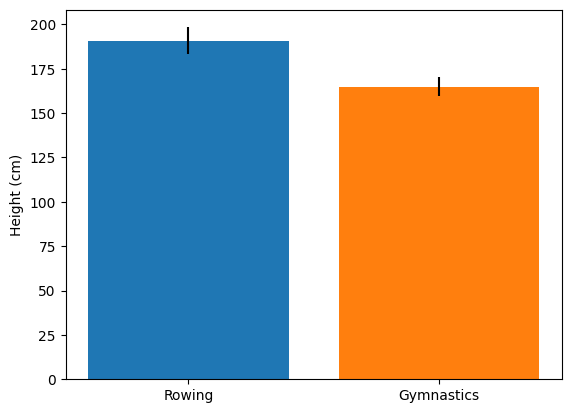

In [ ]:
# Adding error bars to bar charts

fig, ax = plt.subplots()

ax.bar("Rowing",mens_rowing['Height'].mean(), yerr=mens_rowing["Height"].std())

ax.bar("Gymnastics",mens_gymnastics['Height'].mean(), yerr=mens_gymnastics["Height"].std())

ax.set_ylabel("Height (cm)")

plt.show()

In [ ]:
# Error bar in Line plot
fig, ax = plt.subplots()

ax.errorbar(seattle_weather["MONTH"],seattle_weather["MLY-TAVG-NORMAL"],yerr=seattle_weather["MLY-TAVG-STDDEV"])

ax.errorbar(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"], yerr=austin_weather["MLY-TAVG-STDDEV"])

ax.set_ylabel("Temperature (Fahrenheit)")
plt.show()


**Box Plot**

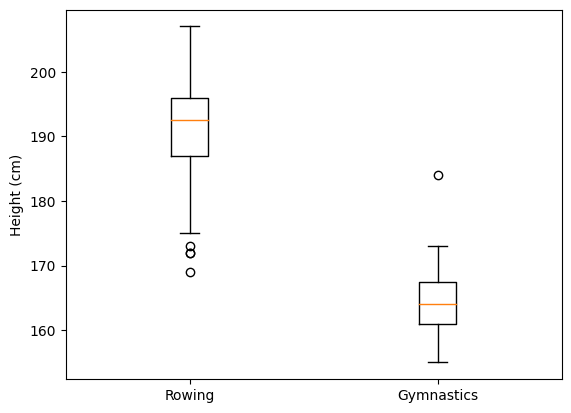

In [ ]:
fig, ax = plt.subplots()

ax.boxplot([mens_rowing["Height"], mens_gymnastics["Height"]])
ax.set_xticklabels(["Rowing", "Gymnastics"])
ax.set_ylabel("Height (cm)")

plt.show()

**Scatter Plot**

In [ ]:
fig, ax = plt.subplots()

ax.scatter(climate_change["co2"], climate_change["relative_temp"])

ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (Celsius)")

plt.show()

**Customizing Scatter Plot**

In [ ]:
eighties = climate_change["1980-01-01":"1989-12-31"]
nineties = climate_change["1990-01-01":"1999-12-31"]

fig, ax = plt.subplots()

ax.scatter(eighties["co2"], eighties["relative_temp"], color="red", label="eighties")
ax.scatter(nineties["co2"], nineties["relative_temp"], color="blue", label="nineties")

ax.legend()
ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (Celsius)")

plt.show()


**Encoding a third variable by color**

In [ ]:
fig, ax = plt.subplots()

ax.scatter(climate_change["co2"], climate_change["relative_temp"], c=climate_change.index)

ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (Celsius)")

plt.show()


In [ ]:
# Change plt style
plt.style.use('ggplot')

**Saving the figure to file**

In [ ]:
fig, ax = plt.subplots()

ax.scatter(climate_change["co2"], climate_change["relative_temp"], c=climate_change.index)

ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (Celsius)")

fig.savefig("file_name.png")